In [334]:
import numpy as np
import random
from queue import PriorityQueue as pq
import math
import copy
from collections import deque as queue
import networkx as nx
import pickle
import numpy as np
from matplotlib import colors
from matplotlib import pyplot as plt
import time

OPEN = 0
WALL = 1
DRONE = 2
bounds = [OPEN, WALL, DRONE]
          # , PATH]
cmap = colors.ListedColormap([
    'white',  # open
    'purple',  # drone
    'black'  # wall
])
norm = colors.BoundaryNorm(bounds, cmap.N)

In [335]:
class Maze:
  OPEN = 0
  WALL = 1

  # # DRONE
  DRONE = 2
    
  def __init__(self, dim=19):
    self.dim = dim
    self.grid = np.zeros((self.dim, self.dim), dtype=int) * self.OPEN
    # self.grid[0] = self.OPEN
    # self.grid[-1] = self.OPEN
    self.drone_list = []
    self.np_grid = self.grid.reshape(dim, dim)
    self.grid = self.np_grid.tolist()

  def addDrone(self):
    clone_maze = self.clone()
    # k=0
    for i in range(clone_maze.dim):
      for j in range(clone_maze.dim):
        if self.grid[i][j] != self.WALL and clone_maze.grid[i][j] != self.WALL:
          clone_maze.grid[i][j] = self.DRONE
          # self.drone_list[k] = (i, j)
          self.drone_list.append((i, j))
          # k+=1
    # clone_maze.visualize()
    # clone_maze.visualize_grid()
    
  def isUnblocked(self, node):
    row, col = node[0], node[1]
    return self.grid[row][col] != self.WALL

  # def isUnblockedWall(self, node):
  #   row, col = node[0], node[1]
  #   return self.grid[row][col]%2 == 0

  def isInMaze(self, node):
    return 0 <= node[0] < self.dim and 0 <= node[1] < self.dim

  def isValid(self, node):
    return self.isInMaze(node) and self.isUnblocked(node)

  def isValid_dum(self, node):
    return self.isInMaze(node) and self.isUnblockedWall(node)

  def get(self, node):
    row, col = node[0], node[1]
    return self.grid[row][col]

  def set(self, node, val):
    self.grid[node[0]][node[1]] = val

  def getChildren(self, current): # o/p will be a list of tuples giving us a list of possible moves
      children = []

      # down
      down = (current[0] + 1, current[1])
      if self.isValid(down):
        children.append(down)

      # right
      right = (current[0], current[1]+1)
      if self.isValid(right):
        children.append(right)
      
      # up direction
      up = (current[0] - 1, current[1])
      if self.isValid(up):
        children.append(up)

      # left 
      left = (current[0], current[1]-1)
      if self.isValid(left):
        children.append(left)
      
      # at any point, we can get max 3 children
      return children  
#######

  def getChildren_dum(self, current): # o/p will be a list of tuples giving us a list of possible moves
      children = []

      # down
      down = (current[0] + 1, current[1])
      if self.isValid_dum(down):
        children.append(down)

      # right
      right = (current[0], current[1]+1)
      if self.isValid_dum(right):
        children.append(right)
      
      # up 
      up = (current[0] - 1, current[1])
      if self.isValid_dum(up):
        children.append(up)

      # left 
      left = (current[0], current[1]-1)
      if self.isValid_dum(left):
        children.append(left)
      
      return children

#######
  def getPath(self, goal, start, parent):
    
    result = [goal]
    while goal != start:
      goal = parent[goal]    
      result.append(goal)
      # print (goal)
    result.reverse()
    return result

  def BFS(self, start, goal):

    fringe = [start]
    visited = set()
    parent = {}
    visited.add(start)

    while(fringe):
      # print(fringe)
      current = fringe.pop(0) #Queue so pop(0) implementing FIFO
      # print(current)
      # visited.add(current) 
      if current == goal:
        return self.getPath(goal, start, parent)
      #print (current,"current")
      children = self.getChildren(current)
      #print(children,"test_BFS")
      for child in children:
        if child not in visited:
          visited.add(child)
          fringe.append(child)
          parent[child] = current

      return None

  def moveDrone(self, commands): ## alters the maze in-place -> returns nothing
    # self.tmp_list = []
    # self.temp_dict = {}
    for command in commands:
      if command == "UP":
        tmp_list = []
        for i in range(len(self.drone_list)):
          if self.drone_list[i][0] == 0:
            continue
          if self.isValid((self.drone_list[i][0] - 1, self.drone_list[i][1])):  
            drone_next = (self.drone_list[i][0] - 1, self.drone_list[i][1])
            # self.drone_list.remove((self.drone_list[i][0], self.drone_list[i][1]))
            if drone_next not in tmp_list:  
              tmp_list.append(drone_next)
            
          else:
            drone_next = (self.drone_list[i][0], self.drone_list[i][1])
            if drone_next not in tmp_list:  
              tmp_list.append(drone_next)
        
        self.drone_list = tmp_list     
            
      elif command == "DOWN":
        tmp_list = []
        for i in range(len(self.drone_list)):
          if self.drone_list[i][0] == self.dim - 1:
            continue
          if self.isValid((self.drone_list[i][0] + 1, self.drone_list[i][1])):
            drone_next = (self.drone_list[i][0] + 1, self.drone_list[i][1])
            # self.drone_list.remove((self.drone_list[i][0], self.drone_list[i][1]))
            if drone_next not in tmp_list:  
              tmp_list.append(drone_next)            
            
          else:
            drone_next = (self.drone_list[i][0], self.drone_list[i][1])
            if drone_next not in tmp_list:  
              tmp_list.append(drone_next)
          
        self.drone_list = tmp_list     
          
        
      elif command == "LEFT":
        tmp_list = []
        for i in range(len(self.drone_list)):
          if self.drone_list[i][1] == 0:
            continue
          if self.isValid((self.drone_list[i][0], self.drone_list[i][1] - 1)):
            drone_next = (self.drone_list[i][0], self.drone_list[i][1] - 1)
            # self.drone_list.remove((self.drone_list[i][0], self.drone_list[i][1]))
            if drone_next not in tmp_list:  
              tmp_list.append(drone_next)
            
          else:
            drone_next = (self.drone_list[i][0], self.drone_list[i][1])
            if drone_next not in tmp_list:  
              tmp_list.append(drone_next)
          
        self.drone_list = tmp_list     
          
            
      elif command == "RIGHT":
        tmp_list = []
        for i in range(len(self.drone_list)):
          if self.drone_list[i][1] == self.dim - 1:
            continue
          if self.isValid((self.drone_list[i][0], self.drone_list[i][1] + 1)):
            drone_next = (self.drone_list[i][0], self.drone_list[i][1] + 1)
            # self.drone_list.remove((self.drone_list[i][0], self.drone_list[i][1]))
            if drone_next not in tmp_list:  
              tmp_list.append(drone_next)
            
          else:
            drone_next = (self.drone_list[i][0], self.drone_list[i][1])
            if drone_next not in tmp_list:  
              tmp_list.append(drone_next)
            
        self.drone_list = tmp_list     

  def clone(self):
    copy_grid = np.array(self.grid).tolist()
    clone_maze = Maze(dim=self.dim)
    clone_maze.grid = copy_grid
    clone_maze.drone_list=copy.deepcopy(self.drone_list)
    return clone_maze

  def visualize(self, path=None): #gets path from getPath

    copy_grid = np.array(self.grid).tolist()

    prev = {}
    if path:
      for node in path:
        prev[node] = self.get(node)
        copy_grid[node[0]][node[1]] += self.PATH

    for row in copy_grid:
      print(row)

  def visualize_grid(self, path=None): #gets path from getPath
    
    copy_grid = np.array(self.grid).tolist()

    l = np.pad(copy_grid, [(1, 1), (1, 1)], mode='constant',constant_values=(1))
    plt.figure(figsize=(10, 10))
    plt.pcolor(l[::-1], cmap=cmap, norm=norm, edgecolors='k', linewidths=0.1)
    plt.tick_params(axis='both', which='both', bottom=False,
                    left=False, labelbottom=False, labelleft=False)
    plt.show()

    # print(copy_grid)

In [338]:
def getPath(goal, start, parent):
  # print (parent)
  # print (start, goal)
    result = [goal]
    while goal != start:
        goal = parent[goal]    
        result.append(goal)
    # print (goal)
    result.reverse()
    return result


def BFS(maze, start, goal):

    fringe = [start]
    visited = set()
    parent = {}
    visited.add(start)

    while(fringe):
        current = fringe.pop(0) #Queue so pop(0) implementing FIFO
        # visited.add(current) 
        if current == goal:
        #print(len(visited))
            return getPath(goal, start, parent)
        #print (current,"current")
        children = maze.getChildren(current)
        #print(children,"test_BFS")
        for child in children:
            if child not in visited:
                visited.add(child)
                fringe.append(child)
                parent[child] = current

    return None

In [339]:
def generate_maze():
  # while True:
  #   maze = Maze(dim=dim, p=p)
  #   path = DFS(maze, (0, 0), (dim-1, dim-1))
  #   if path:
  #     shortest_path = BFS(maze, (0,0), (dim-1, dim-1))
  #     maze.addGhost(ghost_count)
  #     return maze, path, shortest_path

    maze = Maze()
    
    ####### MAZE INPUT FROM FILE #######
    f = open("Thor23-SA74-VERW-Schematic (Classified).txt", "r")
    lines = f.readlines()
    i=0
    for line in lines:
        new_line = line.strip()
        for j in range(len(new_line)):
            if new_line[j] == '_':
                maze.grid[i][j] = 0
            elif new_line[j] == 'X':
                maze.grid[i][j] = 1
        i+=1
    return maze

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
[0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0]
[0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0]
[0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0]
[0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0]
[0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0]
[1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0]
[0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1]
[1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1]
[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0]
[1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1]
[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1]
[0, 1, 1, 1, 1

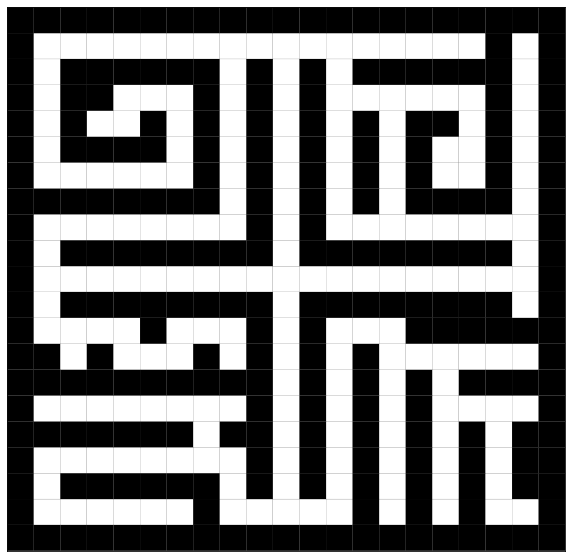

5
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2]
[2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2]
[2, 1, 1, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2]
[2, 1, 2, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 2]
[2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2]
[2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2]
[1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 2]
[2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2]
[2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2]
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2]
[2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 1, 1, 1, 1]
[1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1]
[2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2]
[1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1]
[2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1]
[2, 1, 1, 1,

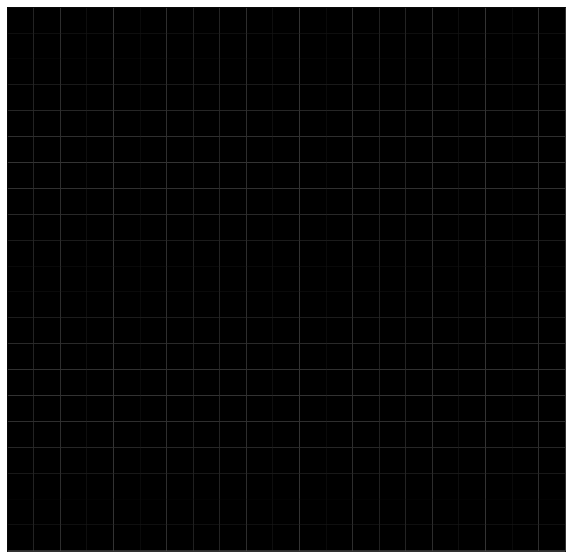

In [385]:
maze = generate_maze()
# print(maze.grid)
maze.visualize()
maze.visualize_grid()
# loc1 = 
# print(len(maze.BFS((0,17), (1,15))))
# print(len(BFS(maze, (0,0), (0, 4))))
# maze.getChildren((9,9))
maze.addDrone()
# clone_maze.visualize()

In [380]:
# ######### RUN THIS ONLY ONCE FOR 1 MAZE WHILE CALCULATING UTIL ###########

# state_space = {}
# reward = 1

# def calc_state_space(maze):
#     for a in range(maze.dim):
#         for b in range(maze.dim):
#             for c in range(maze.dim):
#                 for d in range(maze.dim):
#                     # key = (a, b)
#                     loc1 = (a, b)
#                     loc2 = (c, d)
#                     # if loc1 == maze.WALL or loc2 == maze.WALL:
#                     if maze.isValid(loc1) and maze.isValid(loc2):
#                         key = (loc1, loc2)
#                         # print(key, BFS(maze, (a, b), (c, d)))
#                         util = len(BFS(maze, (a, b), (c, d))) - 1
#                         state_space[key] = [reward, util]                        
#                     else:
#                         continue
                               
#                     # print(util)
# calc_state_space(maze)

In [381]:
# print(state_space[(9,9), (0,0)])

In [382]:
######### RUN THIS ONLY ONCE FOR 1 MAZE ###########

# f = open("exam_util", "w")

# error = True
# count = 0

# while error:
    
#     error = False
#     state_space_copy = copy.copy(state_space)

#     for key in state_space:
#         min_sum_arr = []
#         x1 = key[0][0]
#         y1 = key[0][1]
#         x2 = key[1][0]
#         y2 = key[1][1]
#         loc1 = (key[0][0], key[0][1])
#         loc2 = (key[1][0], key[1][1])

#         if loc1 == loc2:
#             state_space[key] = [state_space[key][0], 0] ## making util ZERO
#             continue

#         for (x1_new, y1_new) in (x1+1, y1), (x1-1, y1), (x1, y1+1), (x1, y1-1): ### since 4 possible moves possible for drone

#             if x1_new == x1+1:
#                 # if maze.isValid(x1_new):
#                 if not maze.isValid((x1_new, y1)):
#                     x1_new = x1
#                 if not maze.isValid((x2+1, y2)):
#                     x2_new = x2
#                 else:
#                     x2_new = x2 + 1
#                 y1_new = y1
#                 y2_new = y2

#             elif x1_new == x1-1:
#                 # if maze.isValid(x1_new):
#                 #     x2_new = x2 - 1
#                 if not maze.isValid((x1_new, y1)):
#                     x1_new = x1
#                 if not maze.isValid((x2-1, y2)):
#                     x2_new = x2
#                 else:
#                     x2_new = x2 - 1
#                 y1_new = y1
#                 y2_new = y2
                
#             elif y1_new == y1+1:
#                 # if maze.isValid(y1_new):
#                 #     y2_new = y2 + 1
#                 if not maze.isValid((x1, y1_new)):
#                     y1_new = y1
#                 if not maze.isValid((x2, y2+1)):
#                     y2_new = y2
#                 else:
#                     y2_new = y2 + 1
#                 x1_new = x1
#                 x2_new = x2
                
#             elif y1_new == y1-1:
#                 # if maze.isValid(y2_new):
#                 #     y2_new = y2 - 1
#                 if not maze.isValid((x1, y1_new)):
#                     y1_new = y1
#                 if not maze.isValid((x2, y2-1)):
#                     y2_new = y2
#                 else:
#                     y2_new = y2 - 1
#                 x1_new = x1
#                 x2_new = x2
                
#             sum = (0.7 * state_space[(x1_new, y1_new), (x2_new, y2_new)][1])
#             sum += state_space[(x1_new, y1_new), (x2_new, y2_new)][0]
#             min_sum_arr.append(sum)

#         state_space[key] = [state_space[key][0], min(min_sum_arr)]
    
#     ## WE RUN TILL ERROR CONVERGES
#     for key in state_space:
#         if abs(state_space[key][1] - state_space_copy[key][1]) > 0.0001:
#             error = True
#             break
    
#     count += 1

# print(count)
# for key in state_space:
#     print(key, state_space[key], file = f)

# f.close()
    

In [383]:
# ###### ---- RUN ONLY ONCE WHEN CALCULATING UTILS ---- ######

# f1 = open("q1_state_space", "wb")
# pickle.dump(state_space, f1)
# f1.close()

In [386]:
######## ---- RUN THIS EACH TIME WHEN RECONNECTING TO RUNTIME ---- #########

f2 = open("q1_state_space", "rb")
state_space_copy =  pickle.load(f2)
f2.close()

In [217]:
# if state_space == state_space_new:
#     print(True)

In [ ]:
# ## this code should run till drones merge into 1 drone 
  ### NOTE: WRITE DRONE MERGING CODE 

    # ### calculate state for which max util -> check all pnc of
            
    #  #### move acc to util for those 2 points and save steps in a MAIN LIST
    #  #### and apply the same to all other drones
    #  ##### merge other drones along the way
    # # KEEP REPEATING THIS EVERY TIME THE SELECTED DRONES CONVERGE 
    

In [387]:
### CALCULATING 2 CELLS THAT HAVE THE MINIMUM UTILITY

def min_util_pos(maze, commands, state_space):
    pnc_pos_util = {}
    # drone_list = maze.drone_list
    # maze.moveDrone(commands)
    
    for loc1 in range(0, len(maze.drone_list)-1):
        for loc2 in range(loc1+1, len(maze.drone_list)):
            pnc_pos_util[maze.drone_list[loc1], maze.drone_list[loc2]] = state_space[maze.drone_list[loc1], maze.drone_list[loc2]][1]
    
    max_util = min(list(pnc_pos_util.values()))
    for key in pnc_pos_util:
        if pnc_pos_util[key] == max_util:
            loc1, loc2 = key
            break
    return loc1, loc2



# c = []
# a, b = min_util_pos(maze, c, state_space_copy)
# print(a, b)
# tc = merge_2_loc(maze, a, b, state_space_copy)
# print(tc)

In [ ]:
#### MERGES 2 LOCATIONS THAT WE HAVE TAKEN FROM min_util_pos
def merge_2_loc(maze, loc1, loc2, state_space):
    tmp_commands = []
    while loc1 != loc2:
        x1, y1 = loc1
        x2, y2 = loc2
        
        nbr_util = {}
        for (x1_new, y1_new) in (x1 + 1, y1), (x1 - 1, y1), (x1, y1 + 1), (x1, y1 - 1): ### since 4 possible moves possible for drone

            if x1_new == x1+1:
                # if maze.isValid(x1_new):
                if not maze.isValid((x1_new, y1)):
                    x1_new = x1
                if not maze.isValid((x2 + 1, y2)):
                    x2_new = x2
                else:
                    x2_new = x2 + 1
                y1_new = y1
                y2_new = y2

            elif x1_new == x1-1:
                # if maze.isValid(x1_new):
                #     x2_new = x2 - 1
                if not maze.isValid((x1_new, y1)):
                    x1_new = x1
                if not maze.isValid((x2 - 1, y2)):
                    x2_new = x2
                else:
                    x2_new = x2 - 1
                y1_new = y1
                y2_new = y2
                
            elif y1_new == y1+1:
                # if maze.isValid(y1_new):
                #     y2_new = y2 + 1
                if not maze.isValid((x1, y1_new)):
                    y1_new = y1
                if not maze.isValid((x2, y2 + 1)):
                    y2_new = y2
                else:
                    y2_new = y2 + 1
                x1_new = x1
                x2_new = x2
                
            elif y1_new == y1-1:
                # if maze.isValid(y2_new):
                #     y2_new = y2 - 1
                if not maze.isValid((x1, y1_new)):
                    y1_new = y1
                if not maze.isValid((x2, y2 - 1)):
                    y2_new = y2
                else:
                    y2_new = y2 - 1
                x1_new = x1
                x2_new = x2

            nbr_util[(x1_new, y1_new),(x2_new, y2_new)] = state_space[(x1_new, y1_new),(x2_new, y2_new)][1]
        
        min_nbr_util = min(list(nbr_util.values()))
        for key in nbr_util:
            if nbr_util[key] == min_nbr_util:
                loc1_new, loc2_new = key
                break
        x1_new, y1_new = loc1_new
        x2_new, y2_new = loc2_new

        if x1_new == x1 + 1 or x2_new == x2 + 1:
            tmp_commands.append("DOWN")
        elif x1_new == x1 - 1 or x2_new == x2 - 1:
            tmp_commands.append("UP")
        elif y1_new == y1 + 1 or y2_new == y2 + 1:
            tmp_commands.append("RIGHT")
        elif y1_new == y1 - 1 or y2_new == y2 - 1:
            tmp_commands.append("LEFT")

        loc1 = loc1_new
        loc2 = loc2_new

    return tmp_commands    



In [388]:
#### 
commands = []
while(len(maze.drone_list) > 1):
    print(len(maze.drone_list))
    # commands = []
    loc1, loc2 = min_util_pos(maze, commands, state_space_copy)
    tmp_commands = merge_2_loc(maze, loc1, loc2, state_space_copy)
    # print(tmp_commands)
    for i in tmp_commands:
        commands.append(i)    
    maze.moveDrone(tmp_commands)


199
171
154
141
129
119
111
105
100
98
96
94
92
90
88
86
84
80
69
60
51
44
37
32
30
27
26
25
22
21
19
18
17
16
15
14
13
12
10
7
5
4
2


In [349]:
com = commands
maze.moveDrone(com)

In [396]:
### THIS IS THE POSITION THE SEQUENCE ENDS AT AND WE FIND OUR LOCATION
print(maze.drone_list) 

[(7, 7)]


In [393]:
### IMPLIES ALL THE DRONES HAVE MERGED INTO 1
print(len(maze.drone_list)) 

1


In [389]:
### THIS IS THE SEQUENCE OF COMMANDS THAT LEAD TO CONVERGENCE
print(commands)

['LEFT', 'LEFT', 'LEFT', 'LEFT', 'LEFT', 'LEFT', 'LEFT', 'LEFT', 'LEFT', 'LEFT', 'LEFT', 'LEFT', 'LEFT', 'LEFT', 'LEFT', 'LEFT', 'UP', 'UP', 'UP', 'UP', 'UP', 'UP', 'UP', 'UP', 'DOWN', 'RIGHT', 'RIGHT', 'UP', 'RIGHT', 'RIGHT', 'RIGHT', 'UP', 'UP', 'UP', 'UP', 'UP', 'UP', 'UP', 'LEFT', 'DOWN', 'DOWN', 'LEFT', 'LEFT', 'DOWN', 'DOWN', 'DOWN', 'DOWN', 'LEFT', 'LEFT', 'LEFT', 'LEFT', 'DOWN', 'DOWN', 'UP', 'LEFT', 'DOWN', 'LEFT', 'LEFT', 'DOWN', 'DOWN', 'DOWN', 'RIGHT', 'RIGHT', 'LEFT', 'LEFT', 'UP', 'UP', 'LEFT', 'LEFT', 'LEFT', 'LEFT', 'RIGHT', 'UP', 'UP', 'UP', 'UP', 'UP', 'UP', 'UP', 'LEFT', 'LEFT', 'LEFT', 'LEFT', 'LEFT', 'LEFT', 'LEFT', 'LEFT', 'LEFT', 'RIGHT', 'RIGHT', 'DOWN', 'DOWN', 'DOWN', 'LEFT', 'LEFT', 'LEFT', 'LEFT', 'LEFT', 'UP', 'UP', 'UP', 'UP', 'UP', 'RIGHT', 'RIGHT', 'RIGHT', 'RIGHT', 'RIGHT', 'RIGHT', 'RIGHT', 'DOWN', 'DOWN', 'DOWN', 'DOWN', 'DOWN', 'DOWN', 'DOWN']


In [395]:
### NUMBER OF STEPS TILL CONVERGENCE
print(len(commands))

117


[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2]
[2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2]
[2, 1, 1, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2]
[2, 1, 2, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 2]
[2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2]
[2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2]
[1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 2]
[2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2]
[2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2]
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2]
[2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 1, 1, 1, 1]
[1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1]
[2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2]
[1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1]
[2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1]
[2, 1, 1, 1, 1

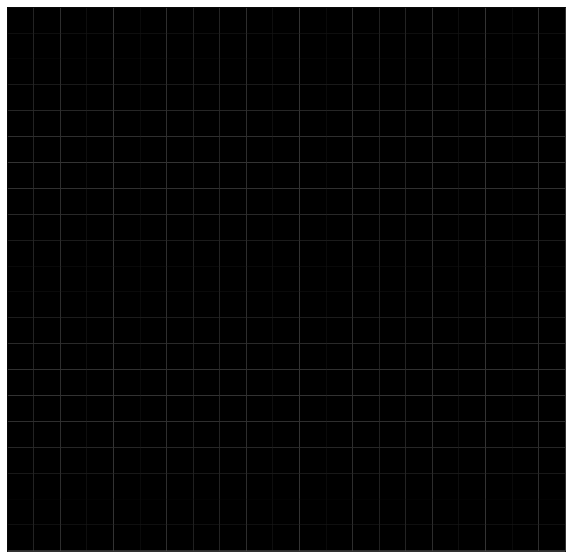

In [409]:
maze1 = generate_maze()

maze1.addDrone()

# clone_maze.visualize()

In [410]:
maze1.moveDrone(commands)

In [412]:
print(maze1.drone_list)

[(7, 7)]
